<a href="https://colab.research.google.com/github/gracesjy/github.io/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8A%A4%ED%83%80%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오차 구하기

In [ ]:
import numpy as np

y = np.array([1,2,3,4,5])
yhat = np.array([1.2,2.4,2.5,4.6,5.4])
diff = (y-yhat)**2
e_mse = np.average(diff)
print ('mse : ', e_mse)

mse :  0.19399999999999995


In [ ]:
from sklearn.metrics import mean_squared_error

print('msg from sklearn : ', mean_squared_error(y,yhat))

msg from sklearn :  0.19399999999999995


# 간단한 선형 회귀

In [ ]:
import numpy as np
from sklearn import linear_model
regr = linear_model.LinearRegression()
#x = [[163],[178],[166],[169],[171]]
x = np.array([163,178,166,169,171])
X = x[:, np.newaxis]
y = [54,63,57,56,58]

regr.fit(X,y)

LinearRegression()

In [ ]:
coef = regr.coef_
intercept = regr.intercept_

score = regr.score(X,y)
print ('y = {}*X + {:.2f}'.format(coef.round(2), intercept))
print ('score : {:.1%}'.format(score))

y = [0.56]*X + -37.85
score : 90.8%


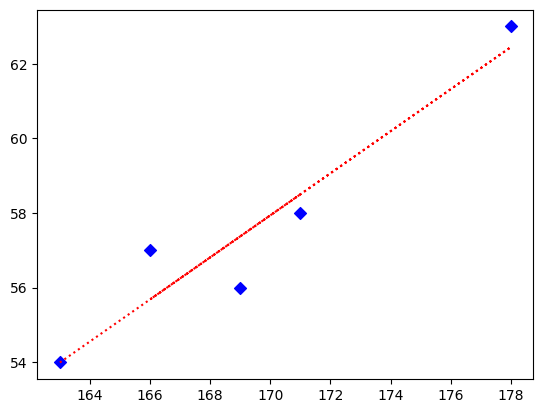

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color='blue', marker='D')
y_pred = regr.predict(X)
plt.plot(X,y_pred, 'r:')

In [ ]:
yr = np.array([15,30,23,5,9])
yr_x = yr[:, np.newaxis]
type(yr_x)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
yr_scaled = scaler.fit_transform(yr_x)

yr_scaled.flatten()
a = yr_scaled.reshape(-1)
a

array([-0.15363295,  1.49243436,  0.72426961, -1.25101115, -0.81205987])

In [ ]:
def activation(s):
  return 1 if s >= 0 else 0

print(activation(.3))


1


In [ ]:
def perceptron(X,W):
  sigma = np.sum(X * W)
  return activation(sigma)

시그모이드 함수 ..

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))


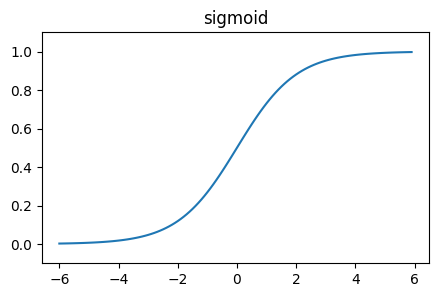

In [ ]:
inputs = np.arange(-6.0, 6.0, 0.1)
outputs = sigmoid(inputs)

plt.figure(figsize=(5,3))
plt.plot(inputs, outputs)
plt.ylim(-0.1,1.1)
plt.title('sigmoid', fontsize=12)
plt.show()

# 텐서플로우

In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) =\
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [46]:
print(train_images.shape)
print(train_labels)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


In [47]:
num = train_images[0]
for i in range(28):
  for j in range(28):
    print('{:4d}'.format(num[i][j]), end='')

  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

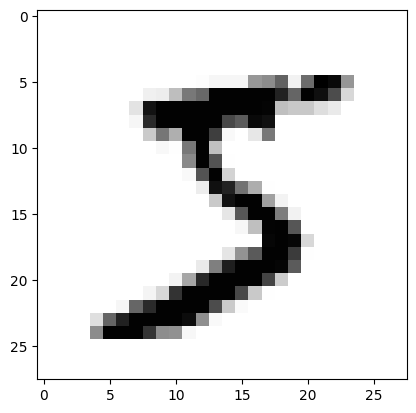

In [49]:
plt.imshow(train_images[0], cmap='Greys')

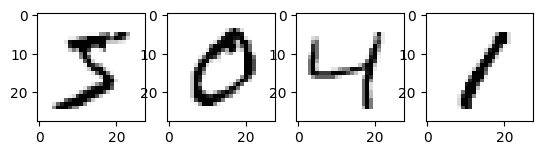

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.imshow(train_images[0], cmap='Greys')
ax2.imshow(train_images[1], cmap='Greys')
ax3.imshow(train_images[2], cmap='Greys')
ax4.imshow(train_images[3], cmap='Greys')

plt.show()

In [53]:
train_images, test_images = train_images/255, test_images/255

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [55]:
model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4411 - accuracy: 0.6517
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6354 - accuracy: 0.8400
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4656 - accuracy: 0.8769


# softmax 함수 .. 확률적으로 움직이며, 부드러운 최대값.

In [56]:
def softmax(a):
  exp_of_a = np.exp(a)
  sum_exp = np.sum(exp_of_a)
  y = exp_of_a / sum_exp
  return y


# 원핫 인코딩, 범주형 데이터

In [57]:
import numpy as np
from keras.utils import to_categorical
data = np.array([0, 1, 2, 3, 4])
print(data)
encoded = to_categorical(data)
print(encoded)

[0 1 2 3 4]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [58]:
color_data = ['red','blue','green']
color_dic = {v : k for v, k in enumerate(color_data)}
color_dic

{0: 'red', 1: 'blue', 2: 'green'}

In [60]:
data = np.array(list(color_dic.keys()))
encoded = to_categorical(data)
encoded

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [62]:
for i in range(len(color_data)):
  print('{:5s} : {}'.format(color_data[i], encoded[i]))

red   : [1. 0. 0.]
blue  : [0. 1. 0.]
green : [0. 0. 1.]


# 용어 정리
## 에폭 - 주어진 훈련 데이터 셋에 대해서 알고리즘이 실행되는 횟수
## 샘플 - 데이터의 기본 단위
## 배치 - 모델 파라미터를 업데이트 하기 위해서 사용할 샘플 수